In [143]:
#import required lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [144]:
#load data from csv file
df = pd.read_csv('loan.csv',low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [146]:
# check no of row and columns
df.shape

(39717, 111)

In [147]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [148]:
# drop cloumns having null values in all rows only
df.dropna(axis = 1,how='all',inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [149]:
# again check no of columns
df.shape

(39717, 57)

In [88]:
# now checking & analyze 57 columns.
for col in df.columns:
    print("Column: {0}".format(col))
    print(df[col].value_counts())

Column: loan_amnt
loan_amnt
10000    2687
12000    2147
5000     1973
6000     1836
15000    1712
         ... 
12625       1
28500       1
22125       1
12425       1
32875       1
Name: count, Length: 853, dtype: int64
Column: funded_amnt_inv
funded_amnt_inv
5000.000000     1262
10000.000000    1212
6000.000000     1154
12000.000000     974
8000.000000      860
                ... 
5695.353089        1
6321.184651        1
14744.955110       1
19836.427270       1
150.000000         1
Name: count, Length: 7560, dtype: int64
Column: term
term
 36     27676
 60      8930
Name: count, dtype: int64
Column: int_rate
int_rate
10.99    863
7.51     768
11.49    756
13.49    722
7.88     702
        ... 
10.64      1
18.36      1
22.94      1
22.64      1
15.01      1
Name: count, Length: 370, dtype: int64
Column: installment
installment
311.11    65
180.96    56
311.02    52
150.80    46
372.12    44
          ..
158.26     1
464.53     1
274.21     1
215.74     1
255.43     1
Name: count, 

In [150]:
# still we have columns does not contribute to loan defaulting.so, dropping these columns also
df.drop(['pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','acc_now_delinq', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt','policy_code','application_type','id', 'member_id', 'url', 'title', 'emp_title', 'zip_code', 'last_credit_pull_d','desc','out_prncp_inv','total_pymnt_inv','funded_amnt', 'delinq_2yrs', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d' , 'chargeoff_within_12_mths', 'mths_since_last_delinq', 'mths_since_last_record'], axis = 1, inplace = True)

In [151]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Current,other,OR,17.94,Jan-96,0,15,0,53.90%,38


In [152]:
# removing missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

In [153]:
# we have found two columns emp_length & revol_util having null values in rows
df.emp_length.fillna(df.emp_length.mode()[0],inplace = True)
df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)

In [154]:
# We have analyzed four columns term,int_rate,emp_length and revol_util haivng data that we need standardized
df.term=df.term.apply(lambda x : x[0:-6])
df.int_rate=df.int_rate.apply(lambda x : x[0:-1])
df.revol_util=df.revol_util.apply(lambda x : x[0:-1])
df.emp_length=df.emp_length.apply(lambda x : 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70,9
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40,4
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50,10
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21,37
4,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,...,Current,other,OR,17.94,Jan-96,0,15,0,53.90,38


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70,9
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40,4
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50,10
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21,37
4,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,...,Current,other,OR,17.94,Jan-96,0,15,0,53.90,38


In [156]:
# we have to analyze chance for default of loan so  
df = df[df.loan_status != "Current"]

In [157]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [66]:
df.isnull().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

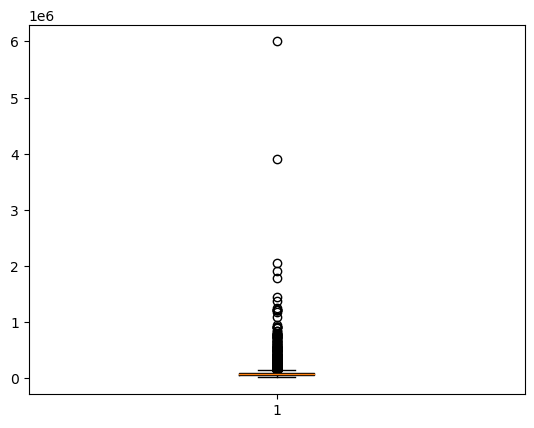

In [73]:
# check for Outlier
plt.boxplot(df['annual_inc'])
plt.show()

In [75]:
annual_inc_quantile = df.annual_inc.quantile([0.25,0.50,0.75,0.90, 0.95, 0.97,0.98, 0.99])
annual_inc_quantile

0.25     40000.0
0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [76]:
quantile_annual_inc_for_95 = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= quantile_annual_inc_for_95]

<Axes: >

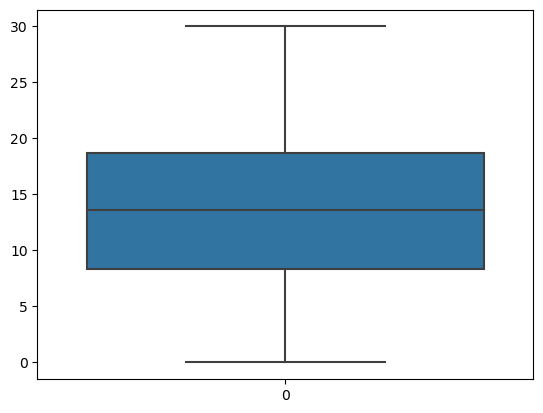

In [91]:
#Let's analyze other numerical variables which could possibly have outlier dti,loan_amnt and funded_amnt_inv
sns.boxplot(df.dti)

<Axes: >

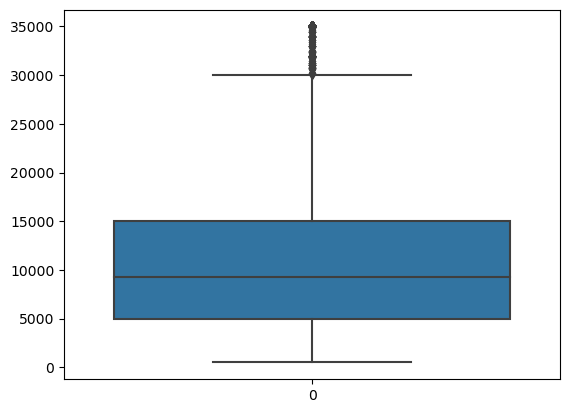

In [92]:
sns.boxplot(df.loan_amnt)

In [93]:
loan_amnt_quantile = df.loan_amnt.quantile([0.25,0.50,0.75,0.90, 0.95, 0.97,0.98, 0.99,1.0])
loan_amnt_quantile

0.25     5000.0
0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

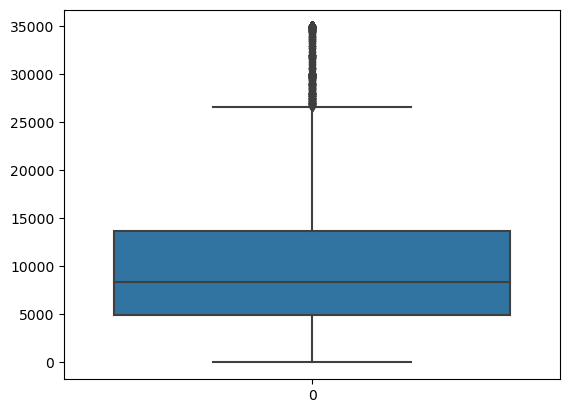

In [94]:
sns.boxplot(df.funded_amnt_inv)

In [96]:
funded_amnt_inv = df.funded_amnt_inv.quantile([0.25,0.50,0.75,0.90, 0.95, 0.97,0.98, 0.99,1.0])
funded_amnt_inv

0.25     4988.276705
0.50     8396.342174
0.75    13649.999283
0.90    19750.000000
0.95    23949.287805
0.97    24975.000000
0.98    27953.287538
0.99    31966.803281
1.00    35000.000000
Name: funded_amnt_inv, dtype: float64

In [97]:
# do not see any outlier in funded_amnt_inv & loan_amnt_quantile

<Axes: xlabel='loan_status', ylabel='count'>

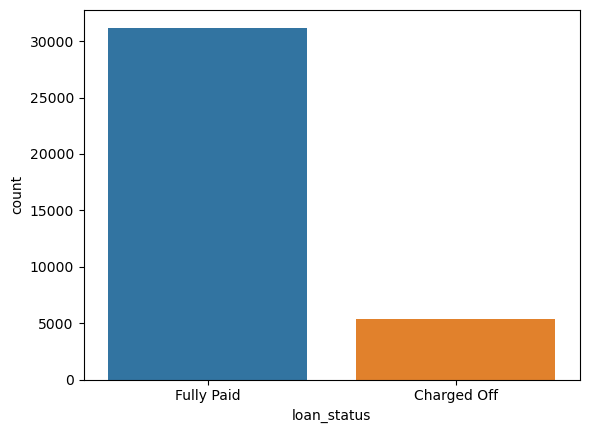

In [99]:
# let analyze Categorical Data

# We are analyzing and visualizing only the defaulter data for categorial data loan_status

sns.countplot(x = 'loan_status', data = df)

In [100]:
df.sub_grade = pd.to_numeric(df.sub_grade.apply(lambda x : x[-1]))
df.sub_grade.unique()

array([2, 4, 5, 1, 3], dtype=int64)

<Axes: xlabel='grade', ylabel='count'>

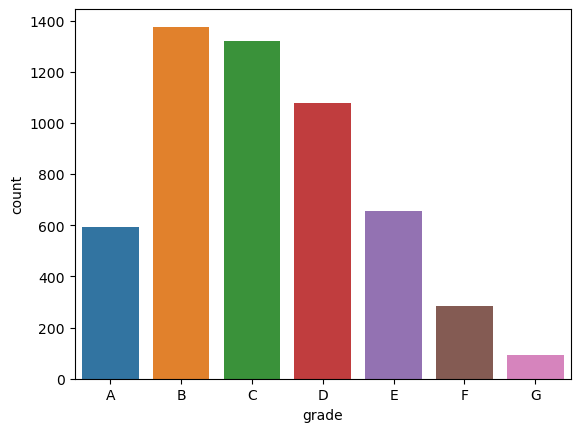

In [101]:
# analyzing defaulter based on grade, looks like grade B is contributing more. 

sns.countplot(x = 'grade', data = df[df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<Axes: xlabel='grade', ylabel='count'>

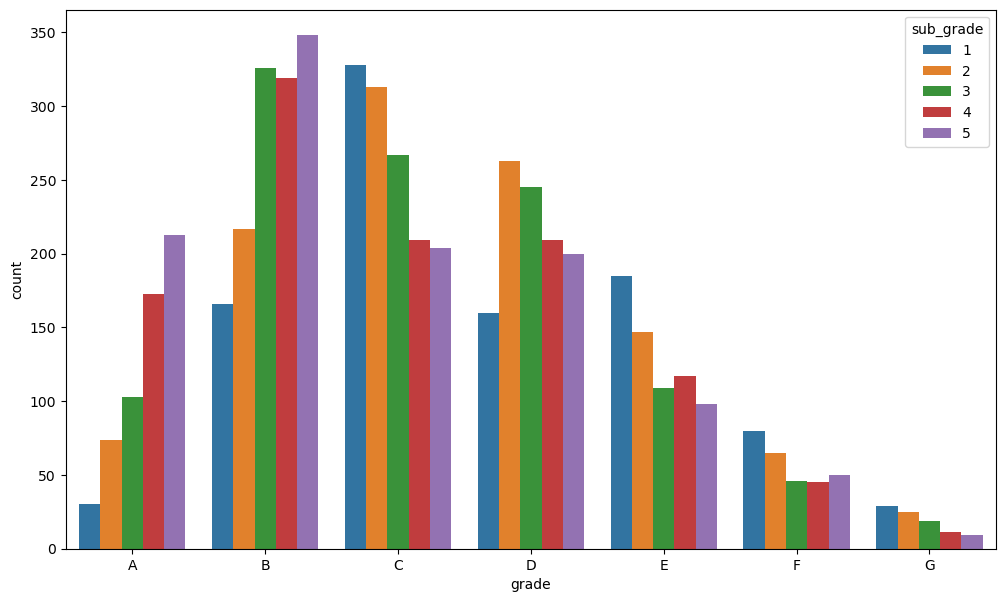

In [102]:
# analyzing defaulter based on grade & subgrade, looks like grade B and sub grade b5 is contributing more. 
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df[df.loan_status == 'Charged Off'])

In [106]:
#checking unique values for home_ownership
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [107]:
df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

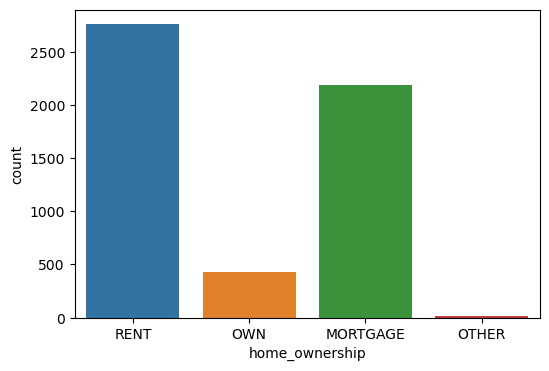

In [109]:
# analyzing defaulter based on home_ownership, looks like Rent owner is contributing more. 

fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='home_ownership', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='addr_state'>

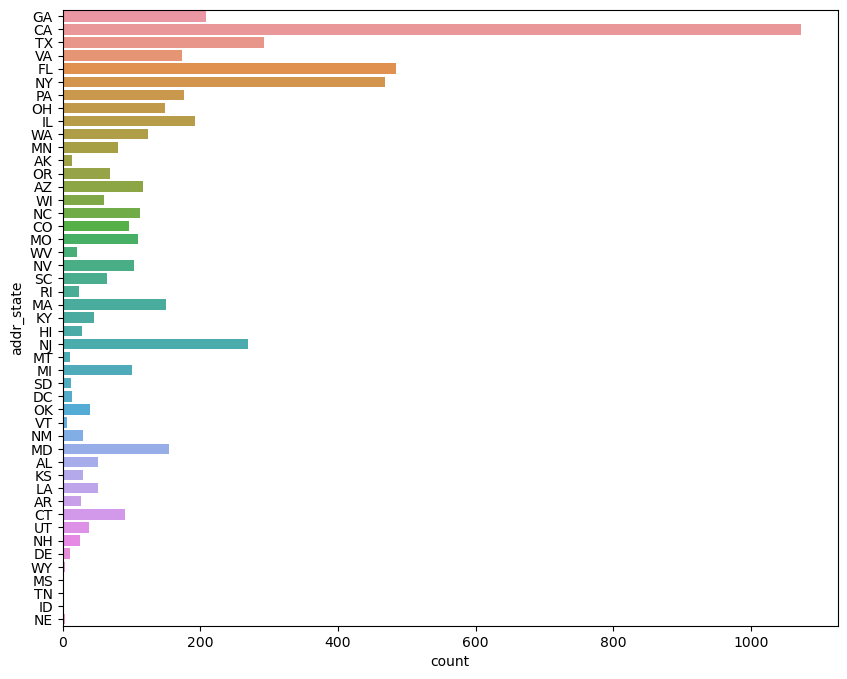

In [113]:
# analyzing defaulter based on state, looks like GA is contributing more. 

fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(y='addr_state', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='emp_length', ylabel='count'>

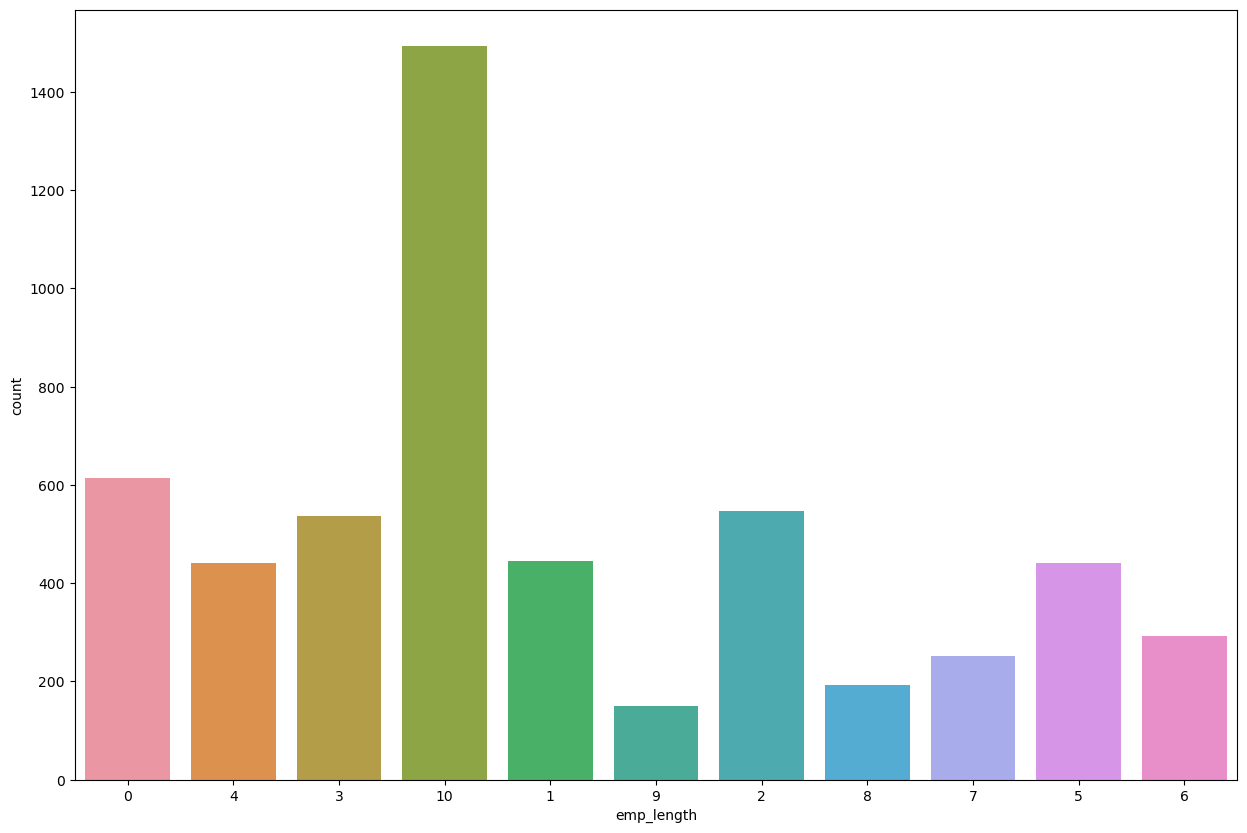

In [127]:
#Analyzing employee year of experience with loan defaulting, having 10 year exp considered in more defaulter list

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x='emp_length', data=df[df.loan_status == 'Charged Off'])

In [130]:
df['total_acc_gps'] = pd.cut(df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
df['annual_inc_gps'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

<Axes: xlabel='total_acc_gps', ylabel='count'>

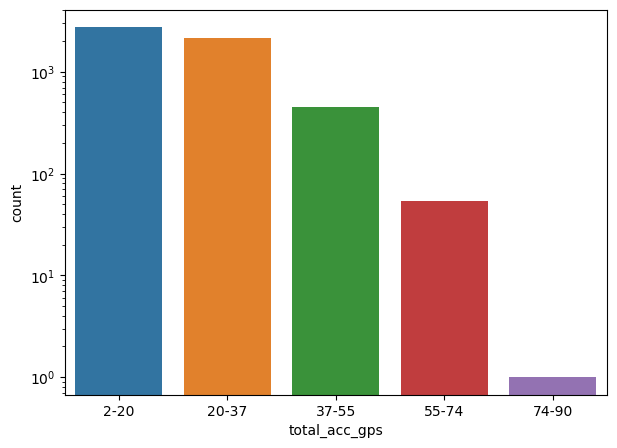

In [131]:
#Similarly analyzing open_acc,annual_inc
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='total_acc_gps', data=df[df.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_gps', ylabel='count'>

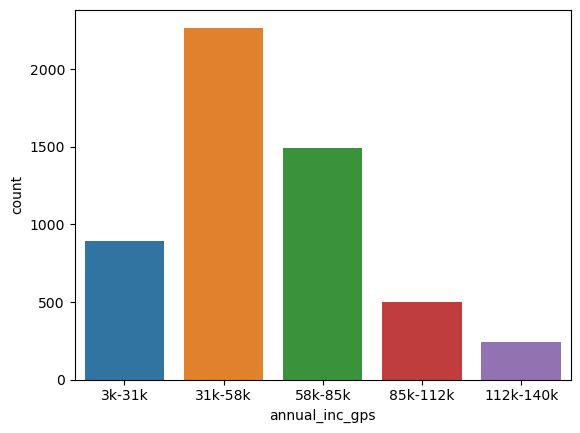

In [132]:
sns.countplot(x='annual_inc_gps', data=df[df.loan_status == 'Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

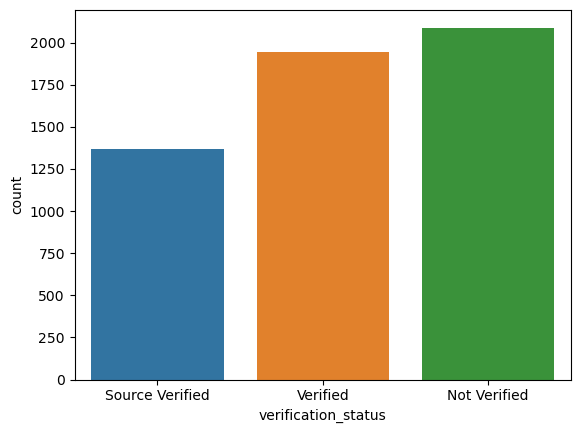

In [134]:
sns.countplot(x='verification_status', data=df[df['loan_status']=='Charged Off'])

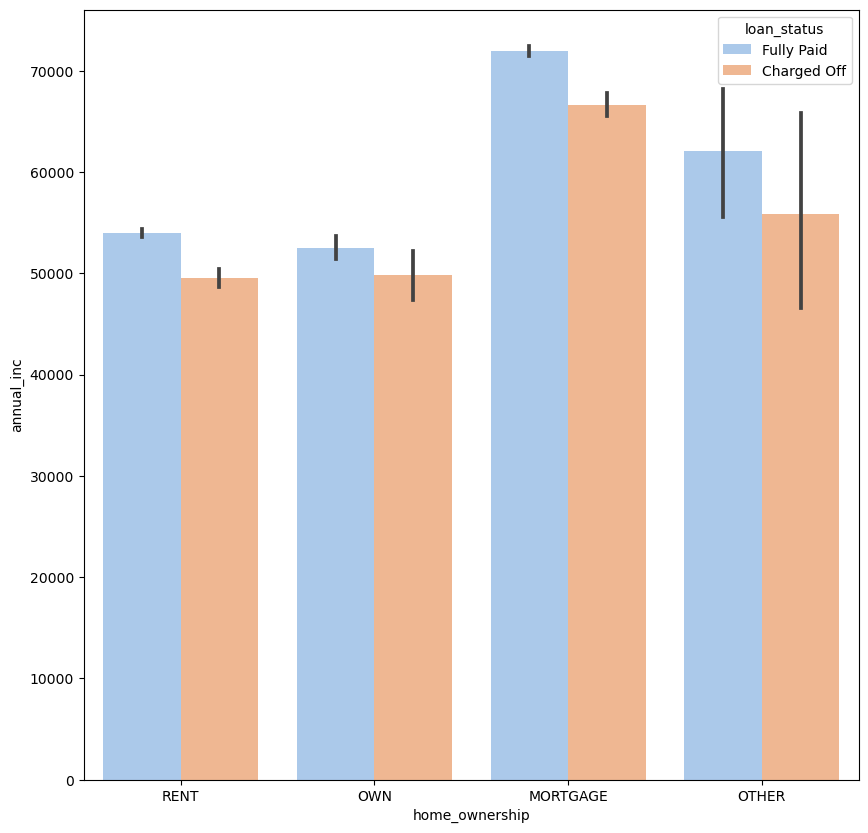

In [136]:
#Annual income vs home ownership
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

<Axes: xlabel='annual_inc_gps', ylabel='loan_amnt'>

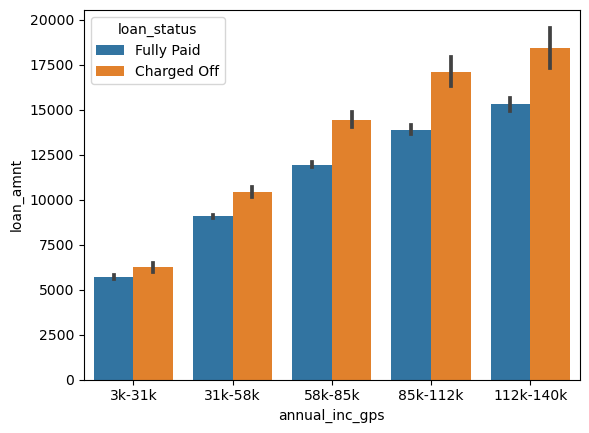

In [141]:
# Annual Income vs Loan amount
sns.barplot(x = "annual_inc_gps", y = "loan_amnt", hue = 'loan_status', data = df)

NameError: name 'loan_data' is not defined

<Figure size 1000x1000 with 0 Axes>